In [268]:
#For this assignment I will try to estimate stock price using polynomial regression algorithm. 
#The reason I chose to use regression is because it is a good starting point and because this is my first time using ML.
#Since the stock price varies, the regression will try to find the best fit line which can predict the output.
#The variable Y can be calculated from a regression model of input variables X.

In [269]:
#import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.pylab import rcParams

In [270]:
#Read the data file
stock = pd.read_csv('NAS.csv')

#Visualize the data
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [271]:
#Drops the zeros and resets index
df = stock.dropna(axis='rows', how='any')
df=df.reset_index(drop=True) 

#Visualize the new data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4213,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4214,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4215,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4216,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [272]:
#check if the values are valid
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [273]:
#information about the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4218 non-null   object 
 1   Open       4218 non-null   float64
 2   High       4218 non-null   float64
 3   Low        4218 non-null   float64
 4   Close      4218 non-null   float64
 5   Adj Close  4218 non-null   float64
 6   Volume     4218 non-null   float64
dtypes: float64(6), object(1)
memory usage: 230.8+ KB


In [274]:
#Setting index as date
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

#Convert dates into number of days
df.index = (df.index - pd.to_datetime('2000-01-01')).days

#Convert series into numpy array
y = np.asarray(df['Close'])
x = np.asarray(df.index.values)

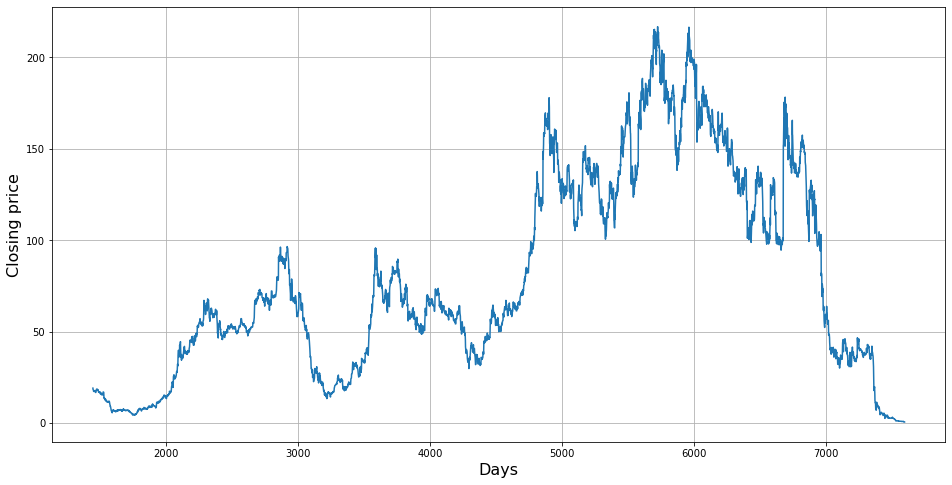

In [275]:
#Visualize the closing price of the stock
plt.figure(figsize=(16,8))
plt.xlabel('Days',fontsize=16)
plt.ylabel('Closing price',fontsize=16)
plt.plot(df['Close'])
plt.grid()

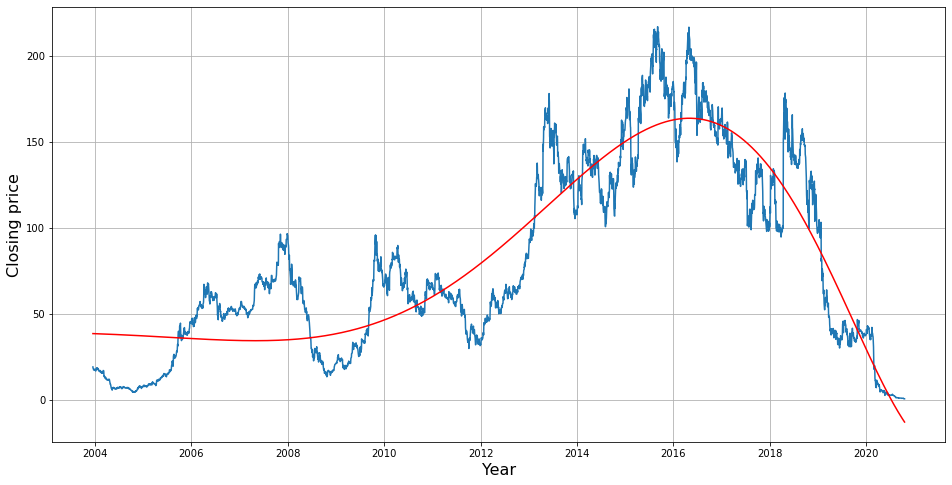

In [276]:
# Model initialization y = ax + b
regression_model = LinearRegression()

#Setting the order of polynomial y = c0 + c1.x*1 + c2.x*2......
poly = PolynomialFeatures(8)

#Converts dimension
X_transform = poly.fit_transform(x.reshape(-1, 1))

#Train the model
regression_model.fit(X_transform, y.reshape(-1, 1))

#Learned values
y_learned = regression_model.predict(X_transform)

#Convert the days back to dates
x = pd.to_datetime(df.index, origin='2000-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='2000-01-01', unit='D')

#Setting figure size
rcParams['figure.figsize'] = 20,10

#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'])
plt.xlabel('Year',fontsize=16)
plt.ylabel('Closing price',fontsize=16)
plt.grid()

#Plot the regression model
plt.plot(x,y_learned, color='r')

In [277]:
def future(E):
    G = [E]
    G = pd.to_datetime(G)
    G = G.map(dt.datetime.toordinal)
    C = regression_model.predict(poly.fit_transform([G]))
    return C

In [278]:
future('2020-10-16')

array([[1.85601834e+20]])